In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import stats

import pickle
from glob import glob

import os
## Get the current working directory
# current_dir = os.getcwd()
## Create a new directory for storing data
# os.makedirs('./data', exist_ok=True)
os.makedirs('./model', exist_ok=True)
# os.makedirs('./pycode', exist_ok=True)
# os.makedirs('./output', exist_ok=True)

## For parquet file Install one of them
# !conda install -c conda-forge pyarrow fastparquet

16

In [3]:
import os
import urllib.request

## Specify the directory to save the files
dest_path = './data'
os.makedirs(dest_path, exist_ok=True)

## Download data for 2019 FHV Taxi data (homework)
URLs    = []  # ['https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv']
year    = 2023
months  = range(1,3)
service = 'yellow'  # 'green', 'yellow', 'fhv', 'fhvhv'

for month in months:
    ## Define URLs (Uniform Resource Locators) for the data files
    url = f"https://d37ci6vzurychx.cloudfront.net/trip-data/{service}_tripdata_{year}-{month:02d}.parquet"
    URLs.append(url)

for url in URLs:    
    ## Extract filename from the URLs
    filename = os.path.basename(url)
    filepath = f"{dest_path}/{filename}"       

    ## Download
    urllib.request.urlretrieve(url, filepath)
    print(f"File downloaded to: {filepath}")

File downloaded to: ./data/yellow_tripdata_2023-01.parquet
File downloaded to: ./data/yellow_tripdata_2023-02.parquet


In [7]:
glob('data/yellow*.parquet')

['data\\yellow_tripdata_2023-01.parquet',
 'data\\yellow_tripdata_2023-02.parquet']

In [10]:
# Read the data for (January 2023)
train_df = pd.read_parquet('data/yellow_tripdata_2023-01.parquet')

# apply this model to the validation dataset (February 2023)
test_df  = pd.read_parquet('data/yellow_tripdata_2023-02.parquet')

train_df.shape, test_df.shape

((3066766, 19), (2913955, 19))

In [12]:
display(train_df, test_df)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.40,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.00,-1.00,-0.5,0.00,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.00,1.00,0.5,0.00,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.90,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.00,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913950,2,2023-02-28 23:46:00,2023-03-01 00:05:00,NaN,4.65,NaN,None,249,140,0,20.22,0.00,0.5,4.84,0.0,1.0,29.06,NaN,NaN
2913951,2,2023-02-28 23:26:02,2023-02-28 23:37:10,NaN,2.47,NaN,None,186,79,0,13.66,0.00,0.5,2.65,0.0,1.0,20.31,NaN,NaN
2913952,2,2023-02-28 23:24:00,2023-02-28 23:38:00,NaN,3.49,NaN,None,158,143,0,17.64,0.00,0.5,0.00,0.0,1.0,21.64,NaN,NaN
2913953,2,2023-02-28 23:03:00,2023-02-28 23:10:00,NaN,2.13,NaN,None,79,162,0,13.56,0.00,0.5,2.63,0.0,1.0,20.19,NaN,NaN


In [13]:
display(train_df.info(), test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

None

None

In [14]:
# train_df.describe(datetime_is_numeric=True).T
display(train_df.describe().T, test_df.describe().T)

,count,mean,min,25%,50%,75%,max,std
VendorID,3066766.0,1.730215,1.0,1.0,2.0,2.0,2.0,0.443848
tpep_pickup_datetime,3066766,2023-01-17 00:22:26.288164,2008-12-31 23:01:42,2023-01-09 16:21:57.250000,2023-01-17 08:42:29.500000,2023-01-24 16:26:27,2023-02-01 00:56:53,NaN
tpep_dropoff_datetime,3066766,2023-01-17 00:38:06.427874,2009-01-01 14:29:11,2023-01-09 16:37:06,2023-01-17 08:58:30.500000,2023-01-24 16:42:49,2023-02-02 09:28:47,NaN
passenger_count,2995023.0,1.362532,0.0,1.0,1.0,1.0,9.0,0.89612
trip_distance,3066766.0,3.847342,0.0,1.06,1.8,3.33,258928.15,249.583756
RatecodeID,2995023.0,1.49744,1.0,1.0,1.0,1.0,99.0,6.474767
PULocationID,3066766.0,166.398046,1.0,132.0,162.0,234.0,265.0,64.244131
DOLocationID,3066766.0,164.392631,1.0,114.0,162.0,234.0,265.0,69.943682
payment_type,3066766.0,1.194483,0.0,1.0,1.0,1.0,4.0,0.529476
fare_amount,3066766.0,18.367069,-900.0,8.6,12.8,20.5,1160.1,17.807822


,count,mean,min,25%,50%,75%,max,std
VendorID,2913955.0,1.731282,1.0,1.0,2.0,2.0,6.0,0.452495
tpep_pickup_datetime,2913955,2023-02-15 00:38:01.639923,2008-12-31 23:05:06,2023-02-08 08:43:13,2023-02-14 22:33:21,2023-02-22 08:34:18,2023-03-07 13:01:28,NaN
tpep_dropoff_datetime,2913955,2023-02-15 00:54:02.594499,2008-12-31 23:31:24,2023-02-08 08:59:34,2023-02-14 22:48:15,2023-02-22 08:50:06,2023-03-07 13:11:17,NaN
passenger_count,2837138.0,1.352847,0.0,1.0,1.0,1.0,9.0,0.889127
trip_distance,2913955.0,3.868058,0.0,1.06,1.79,3.3,335004.33,268.427268
RatecodeID,2837138.0,1.514554,1.0,1.0,1.0,1.0,99.0,6.633395
PULocationID,2913955.0,166.256973,1.0,132.0,162.0,234.0,265.0,64.132296
DOLocationID,2913955.0,164.231667,1.0,113.0,162.0,234.0,265.0,69.754056
payment_type,2913955.0,1.182896,0.0,1.0,1.0,1.0,4.0,0.529722
fare_amount,2913955.0,18.220381,-754.05,8.6,12.8,20.3,2203.1,17.498195


In [15]:
# Calculate duration
train_df['duration'] = train_df['tpep_dropoff_datetime'] - train_df['tpep_pickup_datetime']
test_df['duration']  = test_df['tpep_dropoff_datetime']  - test_df['tpep_pickup_datetime']

# Display the duration
print(train_df['duration'])

0         0 days 00:08:26
1         0 days 00:06:19
2         0 days 00:12:45
3         0 days 00:09:37
4         0 days 00:10:50
                ...      
3066761   0 days 00:13:59
3066762   0 days 00:19:27
3066763   0 days 00:24:31
3066764   0 days 00:13:00
3066765   0 days 00:14:24
Name: duration, Length: 3066766, dtype: timedelta64[us]


In [18]:
# Convert duration to minutes
train_df['duration_min'] = train_df['duration'].dt.total_seconds() / 60
test_df['duration_min']  = test_df['duration'].dt.total_seconds() / 60

# Display the duration in minutes
print(train_df['duration_min'])

0           8.433333
1           6.316667
2          12.750000
3           9.616667
4          10.833333
             ...    
3066761    13.983333
3066762    19.450000
3066763    24.516667
3066764    13.000000
3066765    14.400000
Name: duration_min, Length: 3066766, dtype: float64


In [19]:
# Compute standard deviation of population via Pandas, Round the result to 2 decimal places
print("standard deviation of the trips duration:", round(train_df['duration_min'].std(ddof=0), 2))
print("standard deviation of the trips duration:", round(train_df['duration_min'].std(ddof=1), 2))

standard deviation of the trips duration: 42.59
standard deviation of the trips duration: 42.59


In [147]:
# Define criteria for outliers 
lower, upper = 1, 60  

# Filter DataFrame based on outlier criteria
filtered_train_df = train_df[(train_df['duration_min'] >= lower) & (train_df['duration_min'] <= upper)]
filtered_test_df  = test_df[(test_df['duration_min'] >= lower) & (test_df['duration_min'] <= upper)]

# Calculate the fraction of records left after dropping outliers
fraction_left = len(filtered_train_df) / len(train_df)
fraction_left = round(fraction_left, 2)

# Display the fraction
print("fraction of the records:", fraction_left)

fraction of the records: 0.98


In [148]:
# Specify percentiles for description
train_df[["duration_minutes"]].describe(percentiles=[0.01, 0.0109, 0.99, 0.99209]).T

,count,mean,std,min,1%,1.09%,50%,99%,99.21%,max
duration_minutes,3066766.0,15.668995,42.594351,-29.2,0.783333,1.0,11.516667,57.25,60.0,10029.183333


In [151]:
from sklearn.feature_extraction import DictVectorizer

# Define the categorical columns
categorical = ['PULocationID', 'DOLocationID']

# Extract the pickup and dropoff location IDs into a list of dictionaries
loc_dict_train = filtered_train_df[categorical].astype(str).to_dict(orient='records')
loc_dict_test  = filtered_test_df[categorical].astype(str).to_dict(orient='records')

# Initialize the DictVectorizer
dv = DictVectorizer(sparse=True)

# Perform one-hot encoding on the location IDs
X_train = dv.fit_transform(loc_dict_train)
X_test  = dv.transform(loc_dict_test)

# Get the dimensionality of the feature matrix
print("number of columns:", X_train.shape[1])

number of columns: 515


In [152]:
from sklearn.linear_model import LinearRegression  #, Ridge, Lasso

# Define the target variable
target = 'duration_min'
y_train = filtered_train_df[target]

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable
y_train_pred = model.predict(X_train)
y_train_pred

array([11.52733522, 10.89771938, 11.3257776 , ..., 11.73765804,
       12.70529477, 11.5422464 ])

In [153]:
with open('model/dv_lin_model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

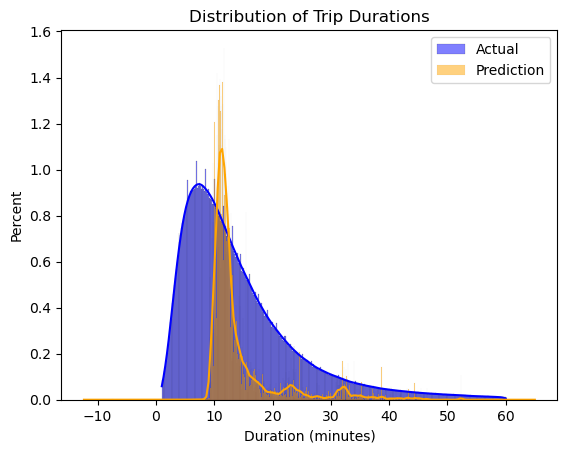

In [155]:
# Create a histogram plot using seaborn with a kernel density estimate line
sns.histplot(
    y_train, discrete=False,
    stat="percent", kde=True, bins='auto', 
    color='blue', label='Actual',
)
sns.histplot(
    y_train_pred, discrete=False,
    stat="percent", kde=True, bins='auto', 
    color='orange', label='Prediction',
)

# Set title and labels
plt.title("Distribution of Trip Durations")
plt.xlabel("Duration (minutes)")

# Display the legend and plot
plt.legend()
plt.show()

In [156]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE on the training data
rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Display the rounded RMSE
print("RMSE on train:", round(rmse, 2))

RMSE on train: 7.65


In [160]:
# Get the dimensionality of the feature matrix
filtered_test_df.shape, X_test.shape[1]

((2855951, 22), 515)

In [161]:
# Create the feature matrix and target array
y_test = filtered_test_df[target]

# Predict the target variable
y_test_pred = model.predict(X_test)
y_test_pred

array([11.36774161, 49.6950657 , 15.18774197, ..., 13.53326005,
       11.09580829, 13.15706396])

In [162]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE on the training data
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Display the rounded RMSE
print("RMSE on test:", round(rmse, 2))

RMSE on test: 7.81


# End of The Project